In [1]:
!pwd

/home/alan_khang/dev/YOLOF-MaskV2-mmcv


In [1]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.2.2 cuda: True
mmdetection: 3.3.0
mmcv: 2.0.0
mmengine: 0.10.7


# YOLOF

In [2]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules

config_file = './configs/yolof_r50-c5_8xb8-1x_coco.py'
ckpt_file = '/home/alan_khang/Downloads/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint=ckpt_file, device='cpu') 

Loads checkpoint by local backend from path: /home/alan_khang/Downloads/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth


In [3]:
image = mmcv.imread('./datasets/coco2017/val2017/000000000139.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    img_id: 0
    batch_input_shape: (800, 1216)
    pad_shape: (800, 1216)
    ori_shape: (426, 640)
    img_path: None
    img_shape: (800, 1202)
    scale_factor: (1.878125, 1.8779342723004695)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([62, 56, 56, 56, 62, 75, 75, 74, 75,  0, 39, 75, 58, 60, 75, 60, 58, 56,
                        56, 56, 75, 56, 58, 72, 60, 56, 60, 56, 56, 58, 60, 72, 56, 75, 60, 60,
                        56, 62, 62, 60, 72, 56, 62, 60, 40, 60, 60, 41, 56, 60, 56, 56,  0, 60,
                        62, 56, 60,  0, 56, 60, 56, 60, 40, 56, 40, 58, 56, 73, 41, 60, 40, 39,
                        39, 75, 73, 56, 60, 45,  0, 56, 75, 60, 60, 56, 39, 62, 56, 60, 58, 56,
                        58, 56, 56, 62, 56, 72, 60, 56, 58, 56])
            bboxes: tensor([[  3.7911, 165.6970, 155.1138, 270.5029],
                       

In [4]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/alan_khang/miniconda3/envs/unipercepnet_v2/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


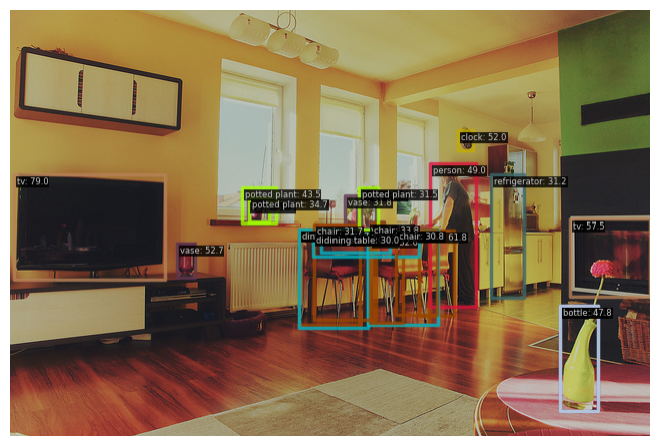

In [5]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

# TOOD

In [2]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules

config_file = './configs/tood_r50_fpn_anchor-based_1x_coco.py'
ckpt_file = '/home/alan_khang/Downloads/tood_r50_fpn_anchor_based_1x_coco_20211214_100105-b776c134.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint=ckpt_file, device='cpu') 

Loads checkpoint by local backend from path: /home/alan_khang/Downloads/tood_r50_fpn_anchor_based_1x_coco_20211214_100105-b776c134.pth


In [3]:
image = mmcv.imread('./datasets/coco2017/val2017/000000000139.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    img_shape: (800, 1202)
    pad_shape: (800, 1216)
    batch_input_shape: (800, 1216)
    ori_shape: (426, 640)
    scale_factor: (1.878125, 1.8779342723004695)
    img_path: None
    img_id: 0

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x796d80c85570>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
        ) at 0x796d80c85420>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            scores: tensor([0.8645, 0.8277, 0.7863, 0.6635, 0.6615, 0.6213, 0.6084, 0.5552, 0.5378,
                        0.5248, 0.4612, 0.4496, 0.4212, 0.4088, 0.3670, 0.3657, 0.3

In [4]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/alan_khang/miniconda3/envs/unipercepnet_v2/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


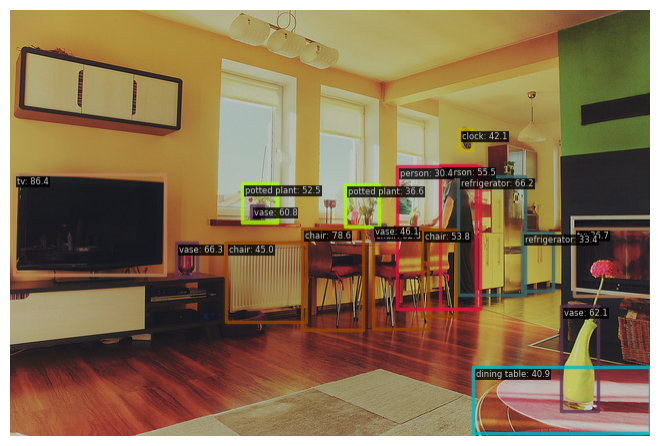

In [5]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

# RegNetX-4GF Segmentation

In [6]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules

config_file = './configs/mask-rcnn_regnetx-4GF_fpn_1x_coco.py'
ckpt_file = '/home/alan_khang/Downloads/mask_rcnn_regnetx-4GF_fpn_1x_coco_20200517_180217-32e9c92d.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint=ckpt_file, device='cpu') 

Loads checkpoint by local backend from path: /home/alan_khang/Downloads/mask_rcnn_regnetx-4GF_fpn_1x_coco_20200517_180217-32e9c92d.pth


In [7]:
image = mmcv.imread('./datasets/coco2017/val2017/000000000139.jpg',channel_order='rgb')
result = inference_detector(model, image)
print(result)

<DetDataSample(

    META INFORMATION
    img_shape: (800, 1202)
    pad_shape: (800, 1216)
    batch_input_shape: (800, 1216)
    ori_shape: (426, 640)
    scale_factor: (1.878125, 1.8779342723004695)
    img_path: None
    img_id: 0

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
            masks: BitmapMasks(num_masks=0, height=426, width=640)
        ) at 0x796d80f179d0>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([], size=(0, 4))
            labels: tensor([], dtype=torch.int64)
            masks: BitmapMasks(num_masks=0, height=426, width=640)
        ) at 0x796d80f17d60>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            scores: tensor([0.9965, 0.9953, 0.988

In [8]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/alan_khang/miniconda3/envs/unipercepnet_v2/lib/python3.10/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


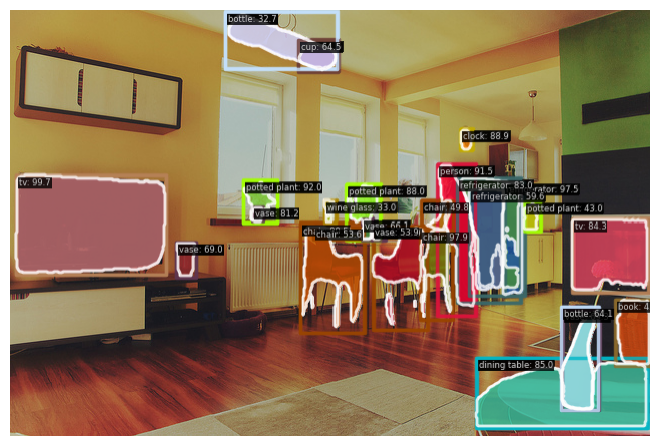

In [9]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
)
visualizer.show()

# My model

In [2]:
import mmcv
import mmengine
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules

config_file = './configs/unipercepnet_v2.py'
ckpt_file = './work_dirs/unipercepnet_v2/epoch_1.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint=ckpt_file, device='cpu') 

Loads checkpoint by local backend from path: ./work_dirs/unipercepnet_v2/epoch_1.pth


In [9]:
image = mmcv.imread('./datasets/coco2017/val2017/000000000285.jpg',channel_order='rgb')
result = inference_detector(model, image)

In [7]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

/home/alan_khang/miniconda3/envs/unipercepnet_v2/lib/python3.10/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


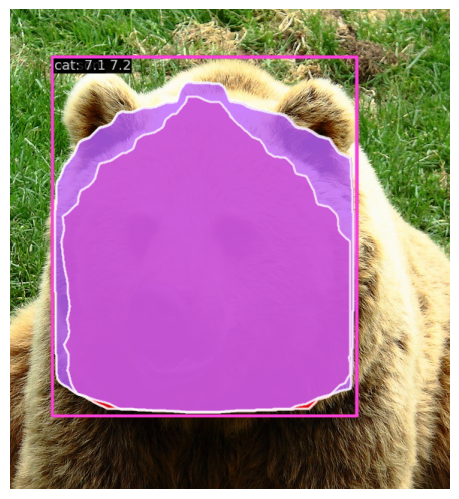

In [14]:
# show the results
visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    pred_score_thr=0.07,
    wait_time=0,)
visualizer.show()